In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
weather_data = pd.read_csv(r'weather_data_extended(1).csv')

In [115]:
print(weather_data.head())

   Location       Observation Time  Temperature (°C)  Feels Like (°C)  \
0  New York         4/5/2022 14:15               8.1              4.1   
1  New York        10/5/2022 14:15               8.2              4.2   
2  New York   15/5/2022 2:15:00 PM               8.5              4.5   
3  New York  22/5/2022  2:15:00 PM               8.4              4.4   
4  New York  28/5/2022  2:15:00 PM               8.2              4.2   

   Humidity (%) Weather Condition  
0          40.0     Partly cloudy  
1          40.0     Partly cloudy  
2          40.0     Partly cloudy  
3          40.0     Partly cloudy  
4          40.0     Partly cloudy  


In [117]:
print(weather_data.dtypes)

Location              object
Observation Time      object
Temperature (°C)     float64
Feels Like (°C)      float64
Humidity (%)         float64
Weather Condition     object
dtype: object


In [119]:
print(weather_data.isnull().sum())

Location             300
Observation Time     300
Temperature (°C)     300
Feels Like (°C)      300
Humidity (%)         300
Weather Condition    300
dtype: int64


In [121]:
weather_data.dropna(inplace=True)

In [123]:
weather_data['Observation Time'] = pd.to_datetime(weather_data['Observation Time'])

In [125]:
nyc_data = weather_data[weather_data['Location'] == 'New York']

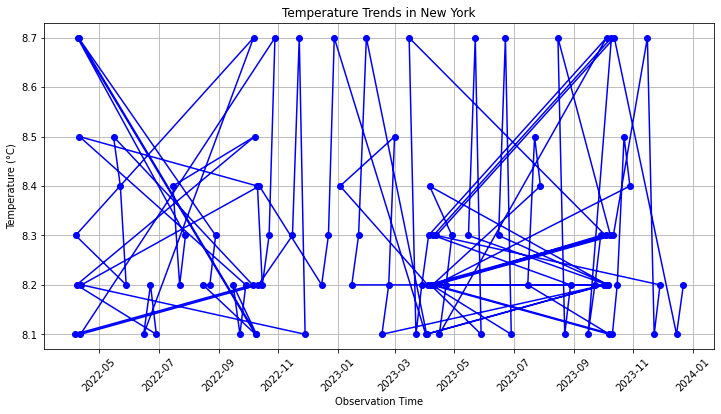

In [127]:
plt.figure(figsize=(12, 6))
plt.plot(nyc_data['Observation Time'], nyc_data['Temperature (°C)'], color='blue', marker='o', linestyle='-')
plt.title('Temperature Trends in New York')
plt.xlabel('Observation Time')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [129]:
mean_temp = nyc_data['Temperature (°C)'].mean()
max_temp = nyc_data['Temperature (°C)'].max()
min_temp = nyc_data['Temperature (°C)' ].min()

print(f"Mean Temperature: {mean_temp:.2f} °C")
print(f"Maximum Temperature: {max_temp:.2f} °C")
print(f"Minimum Temperature: {min_temp:.2f} °C")


Mean Temperature: 8.31 °C
Maximum Temperature: 8.70 °C
Minimum Temperature: 8.10 °C


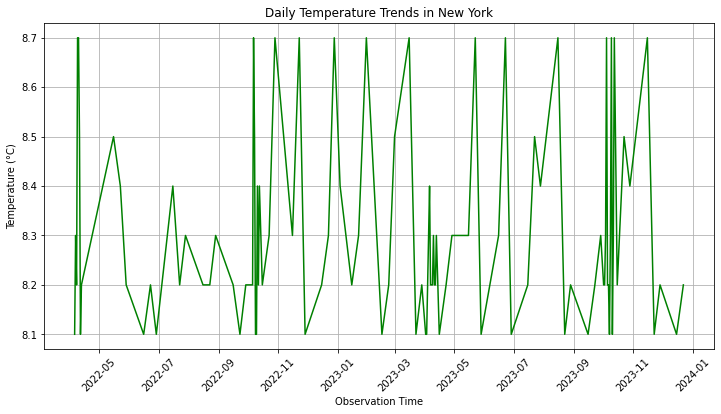

In [131]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=nyc_data, x='Observation Time', y='Temperature (°C)', color='green')
plt.title('Daily Temperature Trends in New York')
plt.xlabel('Observation Time')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [133]:
nyc_data.loc[2:, 'Month'] = nyc_data['Observation Time'].dt.month
nyc_data.loc[5:, 'Year'] = nyc_data['Observation Time'].dt.year

/tmp/ipykernel_205/2903661056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_data.loc[2:, 'Month'] = nyc_data['Observation Time'].dt.month
/tmp/ipykernel_205/2903661056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_data.loc[5:, 'Year'] = nyc_data['Observation Time'].dt.year


In [135]:
monthly_avg_temp = nyc_data.groupby(['Year', 'Month'])['Temperature (°C)'].mean().reset_index()
monthly_avg_temp['Month-Year'] = monthly_avg_temp['Year'].astype(str) + '-' + monthly_avg_temp['Month'].astype(str).str.zfill(2)

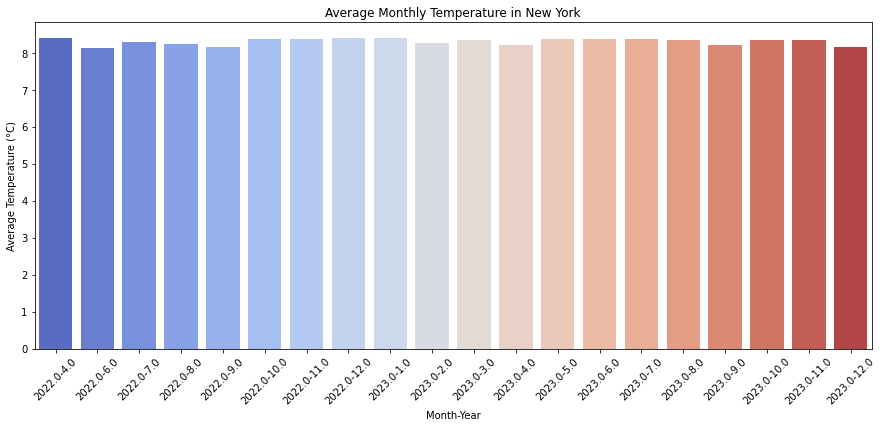

In [137]:
plt.figure(figsize=(15, 6))
sns.barplot(data=monthly_avg_temp, x='Month-Year', y='Temperature (°C)', palette='coolwarm')
plt.title('Average Monthly Temperature in New York')
plt.xlabel('Month-Year')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.show()